In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
stack = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')
print(stack.columns.tolist())

['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq', 'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc', 'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms', 'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites', 'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear', 'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength', 'Trans', 'UndergradMajor', 'WebframeDesireNextYear', 'WebframeWorkedWith', 'WelcomeChange', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']


In [3]:
def get_description_and_unique (col_name, schema = schema):

    description = list(schema[schema['Column'] == col_name]['QuestionText'])[0]
    unique_values = stack[col_name].unique()
    return description, unique_values

In [4]:
get_description_and_unique('YearsCode')

('Including any education, how many years have you been coding in total?',
 array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
        '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
        '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
        '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
        '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
        '49', '48'], dtype=object))

First list of columns
'Age', 'Age1stCode', 'YearsCode', 'ConvertedComp', 'Country', 'DevType', 'Employment', 'JobFactors', 
'JobSat','LanguageWorkedWith', 'NEWCollabToolsWorkedWith', 'NEWLearn', 'NEWPurchaseResearch',
'NEWOvertime', 'OpSys', 'OrgSize', 'UndergradMajor', 'WorkWeekHrs'

In [5]:
df = stack[['YearsCode', 'ConvertedComp', 'Employment', 'DevType', 'JobFactors', 'JobSat', 'LanguageWorkedWith',
        'NEWLearn', 'NEWOvertime', 'OpSys', 'OrgSize', 'UndergradMajor', 'WorkWeekHrs' ]]

In [6]:
df.head()

,YearsCode,ConvertedComp,Employment,DevType,JobFactors,JobSat,LanguageWorkedWith,NEWLearn,NEWOvertime,OpSys,OrgSize,UndergradMajor,WorkWeekHrs
0,36,NaN,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...","Languages, frameworks, and other technologies ...",Slightly satisfied,C#;HTML/CSS;JavaScript,Once a year,Often: 1-2 days per week or more,Windows,2 to 9 employees,"Computer science, computer engineering, or sof...",50.0
1,7,NaN,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,JavaScript;Swift,Once a year,NaN,MacOS,"1,000 to 4,999 employees","Computer science, computer engineering, or sof...",NaN
2,4,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Once a decade,NaN,Linux-based,NaN,NaN,NaN
3,7,NaN,NaN,NaN,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,NaN,Once a year,Occasionally: 1-2 days per quarter but less th...,Linux-based,20 to 99 employees,"Computer science, computer engineering, or sof...",40.0
4,15,NaN,Employed full-time,NaN,NaN,NaN,HTML/CSS;Ruby;SQL,Once a year,NaN,Windows,NaN,"Computer science, computer engineering, or sof...",NaN


In [7]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearsCode           57684 non-null  object 
 1   ConvertedComp       34756 non-null  float64
 2   Employment          63854 non-null  object 
 3   DevType             49370 non-null  object 
 4   JobFactors          49349 non-null  object 
 5   JobSat              45194 non-null  object 
 6   LanguageWorkedWith  57378 non-null  object 
 7   NEWLearn            56156 non-null  object 
 8   NEWOvertime         43231 non-null  object 
 9   OpSys               56228 non-null  object 
 10  OrgSize             44334 non-null  object 
 11  UndergradMajor      50995 non-null  object 
 12  WorkWeekHrs         41151 non-null  float64
dtypes: float64(2), object(11)
memory usage: 6.4+ MB
None
       ConvertedComp   WorkWeekHrs
count   3.475600e+04  41151.000000
mean    1.037561e+05     40.

## Which were the most common programming languages in 2020?

In [8]:
def split_survey_string (dataset, col_name, sep_type):
    
    
    #Order values by count, rename columns and split strings
    temp = dataset[col_name].value_counts().reset_index()
    temp.rename(columns = {'index': 'method', col_name:'count'}, inplace = True)
    temp['method'] = temp['method'].str.split(sep_type)
    
    #Create a list with all separated values
    val_list = []
    for i in range(temp.shape[0]):
        for j in temp['method'][i]:
            val_list.append(j)
    
    #Convert list to series, count values and find the percetage of the total
    series = pd.Series(val_list)
    ratio = (series.value_counts()/series.shape[0])
    
    return ratio

def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [9]:
ratio = split_survey_string (df, 'LanguageWorkedWith', ';')

In [10]:
#Plot top 10 programming languages
def print_percentage_top(series, top_num, title):
    
    temp = series.head(top_num)

    plt.figure(figsize = [11.69, 8.27])
    base_color = sb.color_palette()[0]
    ax = sb.barplot(temp.index, temp.values, color = base_color)

    #Change long label to have the ticks horizontal
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[5] = 'Shell'
    ax.set_xticklabels(labels)

    plt.title(title, fontsize = 18)

    #Remove plot frame
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    #Draw y grid below the bars
    ax.set_axisbelow(True)
    ax.grid(axis='y')

    #Introducte percentages
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate( f'{height:.1%}', (x + width/2, y + height*1.02), ha='center')

    plt.show()

C:\Users\rvile\anaconda3\envs\blogpost\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


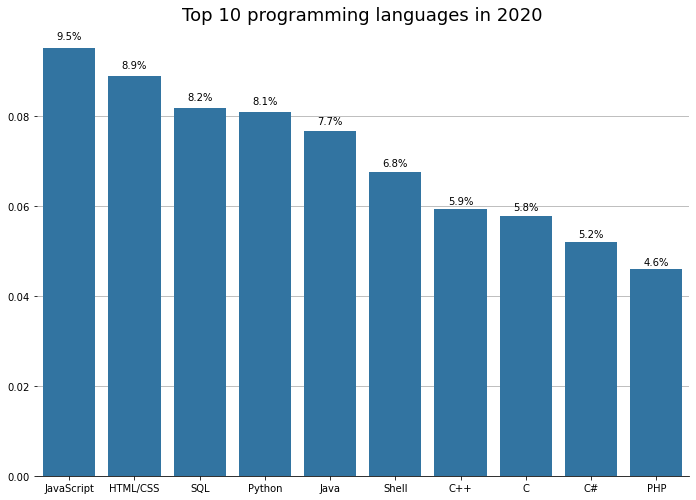

In [11]:
print_percentage_top(ratio, 10, 'Top 10 programming languages in 2020')

C:\Users\rvile\anaconda3\envs\blogpost\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-10-3717e5ae55a7>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


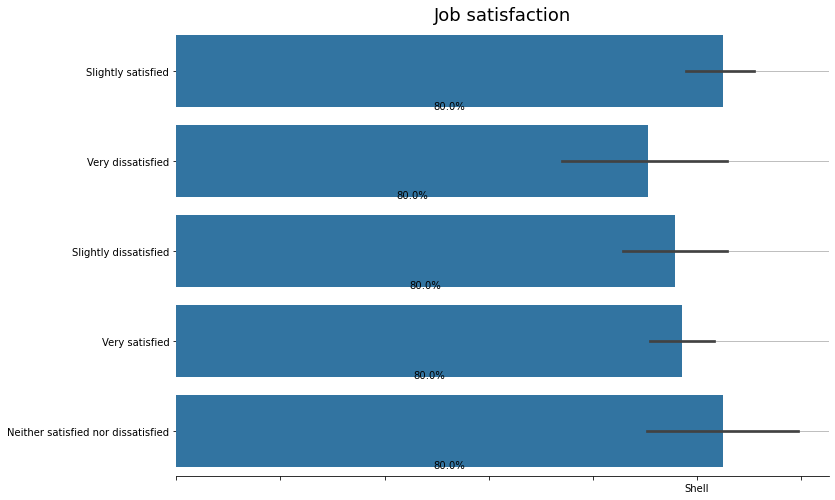

In [56]:
print_percentage_top(df.JobSat, 1000, title = 'Job satisfaction')

## Which variables influence more the salary?

### Understand correlations

In [13]:
df.groupby(['OrgSize']).mean()['ConvertedComp'].sort_values()

OrgSize
2 to 9 employees                                       70442.627061
10 to 19 employees                                     72679.088889
Just me - I am a freelancer, sole proprietor, etc.     81785.383029
20 to 99 employees                                     94023.045251
500 to 999 employees                                  101318.937500
100 to 499 employees                                  104225.637022
5,000 to 9,999 employees                              124124.810638
1,000 to 4,999 employees                              124722.418370
10,000 or more employees                              144626.001659
Name: ConvertedComp, dtype: float64

In [14]:
df.groupby(['OpSys']).mean()['ConvertedComp'].sort_values()

OpSys
Linux-based     94115.891307
Windows         95247.657566
MacOS          124645.584771
BSD            151049.904762
Name: ConvertedComp, dtype: float64

In [15]:
df.groupby(['NEWLearn']).mean()['ConvertedComp'].sort_values()

NEWLearn
Every few months         90159.160298
Once a decade           107657.616176
Once a year             108207.117812
Once every few years    114359.123566
Name: ConvertedComp, dtype: float64

¿Como es posible que los que aprendan mas amenudo tengan menos salario?

In [17]:
df.groupby(['NEWOvertime']).mean()['ConvertedComp'].sort_values()

NEWOvertime
Never                                                        99101.325409
Often: 1-2 days per week or more                             99388.780387
Sometimes: 1-2 days per month but less than weekly          100568.936536
Rarely: 1-2 days per year or less                           106837.885517
Occasionally: 1-2 days per quarter but less than monthly    112275.550806
Name: ConvertedComp, dtype: float64

In [22]:
df.groupby(['UndergradMajor']).mean()['ConvertedComp'].sort_values()


UndergradMajor
A health science (such as nursing, pharmacy, radiology, etc.)                      70738.669291
Web development or web design                                                      79894.124477
Another engineering discipline (such as civil, electrical, mechanical, etc.)       92776.573866
Information systems, information technology, or system administration              93816.513949
Computer science, computer engineering, or software engineering                   102308.640904
A business discipline (such as accounting, finance, marketing, etc.)              109906.890909
A natural science (such as biology, chemistry, physics, etc.)                     113949.783838
Mathematics or statistics                                                         130102.592994
A social science (such as anthropology, psychology, political science, etc.)      130689.137097
I never declared a major                                                          134906.594828
A humanities discipline (

In [19]:
df.loc[df.YearsCode == 'Less than 1 year', 'YearsCode'] = 0
df.loc[df.YearsCode == 'More than 50 years', 'YearsCode'] = 51
df['YearsCode'] = df['YearsCode'].astype(float)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearsCode           57684 non-null  float64
 1   ConvertedComp       34756 non-null  float64
 2   Employment          63854 non-null  object 
 3   DevType             49370 non-null  object 
 4   JobFactors          49349 non-null  object 
 5   JobSat              45194 non-null  object 
 6   LanguageWorkedWith  57378 non-null  object 
 7   NEWLearn            56156 non-null  object 
 8   NEWOvertime         43231 non-null  object 
 9   OpSys               56228 non-null  object 
 10  OrgSize             44334 non-null  object 
 11  UndergradMajor      50995 non-null  object 
 12  WorkWeekHrs         41151 non-null  float64
dtypes: float64(3), object(10)
memory usage: 6.4+ MB
None


C:\Users\rvile\anaconda3\envs\blogpost\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-19-62926fc1ec5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCode'] = df['YearsCode'].astype(float)


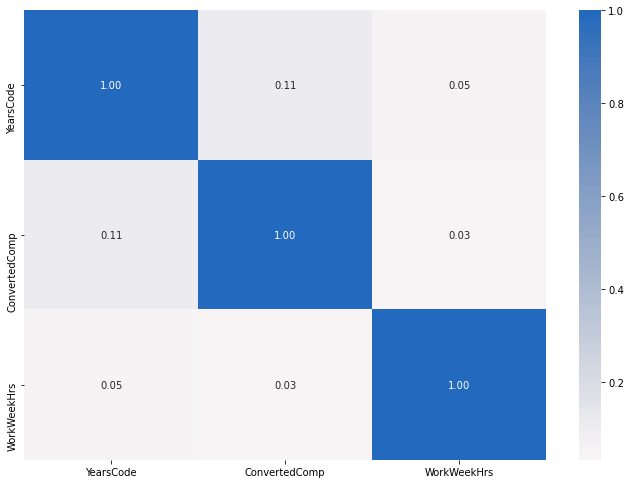

In [20]:
plt.figure(figsize = [11.69, 8.27])
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.show()

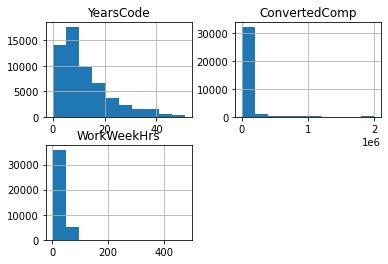

In [38]:
df.hist();

In [16]:
df.groupby(['DevType']).mean()['ConvertedComp'].sort_values()

DevType
Data or business analyst;Database administrator;Developer, back-end;Developer, front-end;Developer, full-stack;Developer, mobile;Developer, QA or test;DevOps specialist;Engineer, data;Engineer, site reliability;Marketing or sales professional;Product manager;Senior executive/VP;System administrator    0.0
Designer;Developer, game or graphics;Engineering manager                                                                                                                                                                                                                                                       0.0
Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;System administrator                                                                                                                                                        0.0
Data or business analyst;Data scientist or machine learning specialist;

### Work with Nan values

In [59]:
def miss_data(df):
    missing_data = pd.DataFrame(columns = ['column_name','missing_data', 'missing_in_percentage'])
    columns = df.columns
    for col in columns:
        col_name = col
        missing_sum = df[col].isnull().sum()
        missing_percentage = (df[col].isnull().mean())*100
        
        missing_data.loc[len(missing_data)] = [col_name, missing_sum, missing_percentage]
    print(missing_data) 

In [60]:
miss_data(df)

           column_name missing_data  missing_in_percentage
0            YearsCode         6777              10.513334
1        ConvertedComp        29705              46.082127
2           Employment          607               0.941655
3              DevType        15091              23.411055
4           JobFactors        15112              23.443633
5               JobSat        19267              29.889390
6   LanguageWorkedWith         7083              10.988039
7             NEWLearn         8305              12.883759
8          NEWOvertime        21230              32.934643
9                OpSys         8233              12.772064
10             OrgSize        20127              31.223531
11      UndergradMajor        13466              20.890151
12         WorkWeekHrs        23310              36.161400


In [87]:
drop_comp_df = df.dropna(subset=['ConvertedComp'], axis=0) #Drop the rows with missing salaries

In [88]:
fill_mean = lambda col: col.fillna(col.mean())
drop_comp_df[['YearsCode', 'WorkWeekHrs']] = drop_comp_df[['YearsCode', 'WorkWeekHrs']].apply(fill_mean, axis=0)

C:\Users\rvile\anaconda3\envs\blogpost\lib\site-packages\pandas\core\frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [89]:
fill_mode = lambda col: col.fillna(col.mode()[0])
drop_comp_df = drop_comp_df.apply(fill_mode, axis=0)

In [90]:
miss_data(drop_comp_df)

           column_name missing_data  missing_in_percentage
0            YearsCode            0                    0.0
1        ConvertedComp            0                    0.0
2           Employment            0                    0.0
3              DevType            0                    0.0
4           JobFactors            0                    0.0
5               JobSat            0                    0.0
6   LanguageWorkedWith            0                    0.0
7             NEWLearn            0                    0.0
8          NEWOvertime            0                    0.0
9                OpSys            0                    0.0
10             OrgSize            0                    0.0
11      UndergradMajor            0                    0.0
12         WorkWeekHrs            0                    0.0


In [78]:
drop_comp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearsCode           34756 non-null  float64
 1   ConvertedComp       34756 non-null  float64
 2   Employment          34756 non-null  object 
 3   DevType             34756 non-null  object 
 4   JobFactors          34756 non-null  object 
 5   JobSat              34756 non-null  object 
 6   LanguageWorkedWith  34756 non-null  object 
 7   NEWLearn            34756 non-null  object 
 8   NEWOvertime         34756 non-null  object 
 9   OpSys               34756 non-null  object 
 10  OrgSize             34756 non-null  object 
 11  UndergradMajor      34756 non-null  object 
 12  WorkWeekHrs         34756 non-null  float64
dtypes: float64(3), object(10)
memory usage: 3.7+ MB


In [91]:
drop_comp_df

,YearsCode,ConvertedComp,Employment,DevType,JobFactors,JobSat,LanguageWorkedWith,NEWLearn,NEWOvertime,OpSys,OrgSize,UndergradMajor,WorkWeekHrs
7,17.0,116000.0,Employed full-time,"Developer, back-end;Developer, desktop or ente...",Remote work options;Opportunities for professi...,Slightly dissatisfied,Python;SQL,Once a year,Occasionally: 1-2 days per quarter but less th...,Linux-based,20 to 99 employees,"Computer science, computer engineering, or sof...",39.000000
9,8.0,32315.0,Employed full-time,"Database administrator;Developer, full-stack;D...",Flex time or a flexible schedule;How widely us...,Very satisfied,HTML/CSS;Java;JavaScript;Python;SQL,Every few months,Often: 1-2 days per week or more,Windows,2 to 9 employees,Mathematics or statistics,36.000000
10,10.0,40070.0,Employed full-time,"Developer, back-end;Developer, desktop or ente...","Flex time or a flexible schedule;Languages, fr...",Slightly dissatisfied,C#;JavaScript;Swift,Every few months,Rarely: 1-2 days per year or less,Windows,"10,000 or more employees","Computer science, computer engineering, or sof...",40.000000
11,7.0,14268.0,Employed full-time,"Designer;Developer, front-end",Remote work options;Office environment or comp...,Very dissatisfied,HTML/CSS;JavaScript,Once every few years,Rarely: 1-2 days per year or less,Windows,2 to 9 employees,Mathematics or statistics,40.000000
12,35.0,38916.0,Employed full-time,"Designer;Developer, back-end",Industry that I’d be working in;Financial perf...,Very satisfied,C;JavaScript;Python,Once every few years,Rarely: 1-2 days per year or less,MacOS,2 to 9 employees,"Computer science, computer engineering, or sof...",36.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64142,3.0,984.0,Employed part-time,"Academic researcher;Developer, back-end;Educator","Flex time or a flexible schedule;Languages, fr...",Neither satisfied nor dissatisfied,HTML/CSS;JavaScript;PHP;TypeScript,Once a year,Often: 1-2 days per week or more,Windows,2 to 9 employees,"Computer science, computer engineering, or sof...",4.000000
64148,12.0,19428.0,Employed full-time,"Developer, QA or test","Industry that I’d be working in;Languages, fra...",Slightly satisfied,HTML/CSS;JavaScript;PHP;SQL,Once a year,Rarely: 1-2 days per year or less,Windows,500 to 999 employees,"Computer science, computer engineering, or sof...",40.000000
64152,25.0,200.0,Employed full-time,"Developer, back-end;Developer, front-end;Devel...","Flex time or a flexible schedule;Languages, fr...",Very satisfied,HTML/CSS;JavaScript;PHP;SQL,Every few months,Never,MacOS,100 to 499 employees,"Computer science, computer engineering, or sof...",40.761557
64153,7.0,15048.0,Employed full-time,"Developer, full-stack;Developer, QA or test;Sy...","Languages, frameworks, and other technologies ...",Neither satisfied nor dissatisfied,HTML/CSS;JavaScript;PHP;SQL,Once a year,Sometimes: 1-2 days per month but less than we...,Windows,2 to 9 employees,"Information systems, information technology, o...",45.000000


### Work with categorical values

### Linear regression

In [21]:
# Consider only numerical variables
X = df[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit - why does this break?
lm_model.fit(X_train, y_train) 

#Predict
#Score

KeyError: "None of [Index(['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction',\n       'StackOverflowSatisfaction'],\n      dtype='object')] are in the [columns]"

In [ ]:
df.DevType.unique()

In [ ]:
df[df['DevType'] == 'Data scientist or machine learning specialist']['LanguageWorkedWith'].value_counts()

In [ ]:
#Useful functions of the course
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75]) #Provide a set of columns with more than 75% of the values missing
no_nulls = set(df.columns[df.isnull().mean()==0]) #Provide a set of columns with 0 missing values.
(ed_vals/df.shape[0]).plot(kind="bar"); # The below should be a bar chart of the proportion of individuals in your ed_vals

#Mean salaries grouped by sex and education
pd.DataFrame(df.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female')").groupby(['Gender', 'FormalEducation']).mean()['Salary'])

